# Wright-Fisher model of mutation and random genetic drift

A Wright-Fisher model has a fixed population size *N* and discrete non-overlapping generations. Each generation, each individual has a random number of offspring whose mean is proportional to the individual's fitness. Each generation, mutation may occur.

## Setup

In [704]:
import numpy as np

## Make population dynamic model

### Setup a population of sequences

Store this as a lightweight Dictionary that maps a string to a count. All the sequences together will have count *N*.

In [705]:
pop_size = 100

In [706]:
seq_length = 10

In [707]:
alphabet = ['A', 'T', 'G', 'C']

In [708]:
pop = {}

In [709]:
base_haplotype = ''.join(["A" for i in range(seq_length)])

In [710]:
pop[base_haplotype] = pop_size

### Add mutation

Mutations occur each generation in each individual in every basepair.

In [711]:
mutation_rate = 0.002 # per gen per individual per site

Walk through population and mutate basepairs. Use Poisson splitting to speed this up. Poisson split works like so:
 * Scenario A: take each element and check for each if event occurs. For example, 100 elements, each with 1% chance. This requires 100 random numbers.
 * Scenario B: Draw a Poisson random number for the number of events that occur and distribute them randomly. In the above example, this will most likely involve 1 random number draw to see how many events and then a few more draws to see which elements are hit.

Need to get random number of total mutations

In [712]:
def get_mutation_count():
    mean = mutation_rate * pop_size * seq_length
    return np.random.poisson(mean)

Above we use Numpy's [Poisson random number](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.poisson.html).

In [713]:
get_mutation_count()

0

Need to get random haplotype from the population.

In [714]:
pop.keys()

['AAAAAAAAAA']

In [715]:
[x/float(pop_size) for x in pop.values()]

[1.0]

In [716]:
def get_random_haplotype():
    haplotypes = pop.keys() 
    frequencies = [x/float(pop_size) for x in pop.values()]
    return np.random.choice(haplotypes, p=frequencies)

Above we use Numpy's [weighted random choice](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html).

In [717]:
hap = get_random_haplotype()

In [718]:
hap

'AAAAAAAAAA'

In [719]:
def get_mutant(haplotype):
    site = np.random.randint(seq_length)
    possible_mutations = list(alphabet)
    possible_mutations.remove(haplotype[site])
    mutation = np.random.choice(possible_mutations)
    new_haplotype = haplotype[:site] + mutation + haplotype[site+1:]
    return new_haplotype

In [720]:
get_mutant(hap)

'AAAATAAAAA'

In [721]:
def mutation_event():
    haplotype = get_random_haplotype()
    if pop[haplotype] > 1:
        pop[haplotype] -= 1
        new_haplotype = get_mutant(haplotype)
        if new_haplotype in pop:
            pop[new_haplotype] += 1
        else:
            pop[new_haplotype] = 1

In [722]:
mutation_event()

In [723]:
pop

{'AAAAAAAAAA': 99, 'AAACAAAAAA': 1}

In [724]:
def mutation_step():
    mutation_count = get_mutation_count()
    for i in range(mutation_count):
        mutation_event()

In [725]:
mutation_step()

In [726]:
pop

{'AAAAAAAAAA': 97, 'AAAAAAAAAG': 1, 'AAAATAAAAA': 1, 'AAACAAAAAA': 1}

### Add genetic drift

In [727]:
def get_offspring_counts():
    haplotypes = pop.keys()
    frequencies = [pop[haplotype]/float(pop_size) for haplotype in haplotypes]
    return list(np.random.multinomial(pop_size, frequencies))

In [728]:
get_offspring_counts()

[99, 0, 0, 1]

In [729]:
def offspring_step():
    counts = get_offspring_counts()
    for (haplotype, count) in zip(pop.keys(), counts):
        if (count > 0):
            pop[haplotype] = count
        else:
            del pop[haplotype]

In [730]:
offspring_step()

In [731]:
pop

{'AAAAAAAAAA': 99, 'AAAAAAAAAG': 1}

### Combine and iterate

In [732]:
generations = 10

In [733]:
def time_step():
    mutation_step()
    offspring_step()

In [734]:
def simulate():
    for i in range(generations):
        time_step()

In [735]:
simulate()

In [736]:
pop

{'AAAAAAAAAA': 90, 'AAAAAAAATA': 1, 'AAAAAACAAG': 4, 'AAAAAAGAAA': 5}

### Record

In [737]:
pop = {"AAAAAAAAAA": pop_size}

In [738]:
history = []

In [739]:
def simulate():
    clone_pop = dict(pop)
    history.append(clone_pop)
    for i in range(generations):
        time_step()
        clone_pop = dict(pop)
        history.append(clone_pop)

In [740]:
simulate()

In [741]:
pop

{'AAAAAAAAAA': 73,
 'AAAAAAAAAT': 2,
 'AAAAAAATAA': 6,
 'AAAAATAAAA': 1,
 'ACAAAAAAAA': 18}

In [742]:
history

[{'AAAAAAAAAA': 100},
 {'AAAAAAAAAA': 98, 'AAAATAAAAA': 2},
 {'AAAAAAAAAA': 100},
 {'AAAAAAAAAA': 97, 'ACAAAAAAAA': 1, 'ATAAAAAAAA': 1, 'TAAAAAAAAA': 1},
 {'AAAAAAAAAA': 93, 'AAAAAAAGAA': 2, 'AAACAAAAAA': 1, 'ACAAAAAAAA': 4},
 {'AAAAAAAAAA': 86,
  'AAAAAAAGAA': 2,
  'AAAAATAAAA': 2,
  'AAACAAAAAA': 3,
  'AATAAAAAAA': 2,
  'ACAAAAAAAA': 5},
 {'AAAAAAAAAA': 83,
  'AAAAAAAAAG': 2,
  'AAAAATAAAA': 3,
  'AAACAAAAAA': 3,
  'AATAAAAAAA': 1,
  'ACAAAAAAAA': 8},
 {'AAAAAAAAAA': 83, 'AAAAAAAAAG': 1, 'AAAAATAAAA': 2, 'ACAAAAAAAA': 14},
 {'AAAAAAAAAA': 79, 'AAAAAAAAAG': 1, 'AAAAATAAAA': 2, 'ACAAAAAAAA': 18},
 {'AAAAAAAAAA': 78,
  'AAAAAAAAAT': 1,
  'AAAAAAATAA': 2,
  'AAAAATAAAA': 1,
  'ACAAAAAAAA': 18},
 {'AAAAAAAAAA': 73,
  'AAAAAAAAAT': 2,
  'AAAAAAATAA': 6,
  'AAAAATAAAA': 1,
  'ACAAAAAAAA': 18}]

## Analyze trajectories

### Calculate diversity and divergence

Here, diversity in population genetics is usually shorthand for the statistic *&pi;*, which measures pairwise differences between random individuals in the population. *&pi;* is usually measured as substitutions per site.

In [743]:
pop

{'AAAAAAAAAA': 73,
 'AAAAAAAAAT': 2,
 'AAAAAAATAA': 6,
 'AAAAATAAAA': 1,
 'ACAAAAAAAA': 18}

In [744]:
def get_distance(seq_a, seq_b):
    diffs = 0
    length = len(seq_a)
    assert len(seq_a) == len(seq_b)
    for chr_a, chr_b in zip(seq_a, seq_b):
        if chr_a != chr_b:
            diffs += 1
    return diffs / float(length)

In [745]:
get_distance("AAAAA", "AAAAB")

0.2

In [746]:
def get_diversity(population):
    haplotypes = population.keys()
    haplotype_count = len(haplotypes)
    diversity = 0
    for i in range(haplotype_count):
        for j in range(haplotype_count):
            haplotype_a = haplotypes[i]
            haplotype_b = haplotypes[j]
            frequency_a = population[haplotype_a] / float(pop_size)
            frequency_b = population[haplotype_b] / float(pop_size)
            frequency_pair = frequency_a * frequency_b
            diversity += frequency_pair * get_distance(haplotype_a, haplotype_b)
    return diversity

In [747]:
get_diversity(pop)

0.046700000000000005

In [748]:
def get_diversity_trajectory():
    trajectory = [get_diversity(generation) for generation in history]
    return trajectory

In [749]:
get_diversity_trajectory()

[0.0,
 0.0039199999999999999,
 0.0,
 0.0059200000000000008,
 0.013580000000000004,
 0.027079999999999989,
 0.032260000000000004,
 0.029980000000000003,
 0.035419999999999993,
 0.037399999999999989,
 0.046699999999999992]

In [750]:
def get_divergence(population):
    haplotypes = population.keys()
    divergence = 0
    for haplotype in haplotypes:
        frequency = population[haplotype] / float(pop_size)
        divergence += frequency * get_distance(base_haplotype, haplotype)
    return divergence

In [751]:
get_divergence(pop)

0.027000000000000003

In [752]:
def get_divergence_trajectory():
    trajectory = [get_divergence(generation) for generation in history]
    return trajectory

### Plot diversity

In [753]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

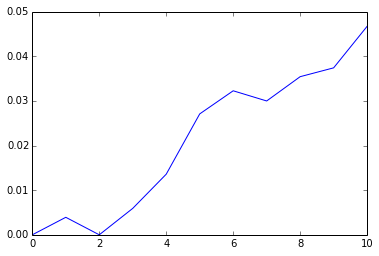

In [754]:
plt.plot(get_diversity_trajectory())

In [755]:
def diversity_plot():
    mpl.rcParams['font.size']=14
    plt.figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
    trajectory = get_diversity_trajectory()
    plt.plot(trajectory)
    plt.ylabel("diversity")
    plt.xlabel("generation")
    plt.show()

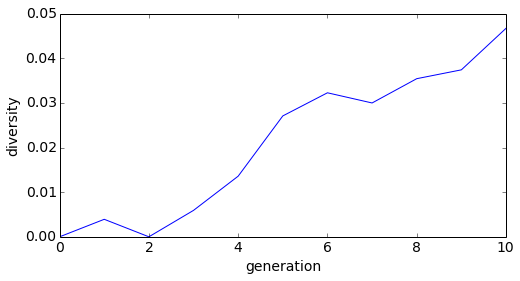

In [756]:
diversity_plot()

In [757]:
def divergence_plot():
    mpl.rcParams['font.size']=14
    plt.figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
    trajectory = get_divergence_trajectory()
    plt.plot(trajectory)
    plt.ylabel("divergence")
    plt.xlabel("generation")
    plt.show()

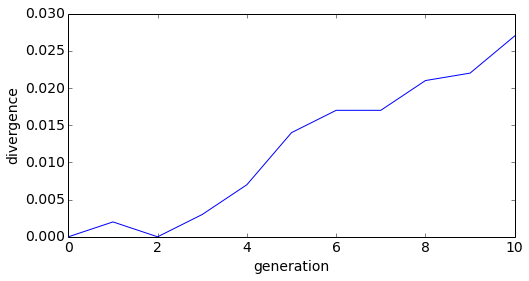

In [758]:
divergence_plot()

### Plot trajectories

In [759]:
def get_frequency(haplotype, generation):
    pop_at_generation = history[generation]
    if haplotype in pop_at_generation:
        return pop_at_generation[haplotype]/float(pop_size)
    else:
        return 0

In [760]:
get_frequency("AAAAAAAAAA", 4)

0.93000000000000005

In [761]:
def get_trajectory(haplotype):
    trajectory = [get_frequency(haplotype, gen) for gen in range(generations)]
    return trajectory

In [762]:
get_trajectory("AAAAAAAAAA")

[1.0,
 0.97999999999999998,
 1.0,
 0.96999999999999997,
 0.93000000000000005,
 0.85999999999999999,
 0.82999999999999996,
 0.82999999999999996,
 0.79000000000000004,
 0.78000000000000003]

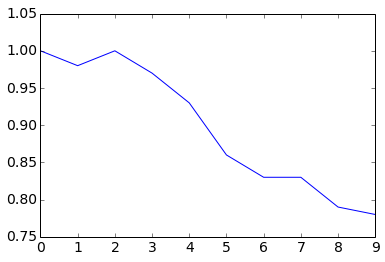

In [763]:
plt.plot(get_trajectory("AAAAAAAAAA"))

In [764]:
def get_all_haplotypes():
    haplotypes = set()   
    for generation in history:
        for haplotype in generation:
            haplotypes.add(haplotype)
    return haplotypes

In [765]:
get_all_haplotypes()

{'AAAAAAAAAA',
 'AAAAAAAAAG',
 'AAAAAAAAAT',
 'AAAAAAAGAA',
 'AAAAAAATAA',
 'AAAAATAAAA',
 'AAAATAAAAA',
 'AAACAAAAAA',
 'AATAAAAAAA',
 'ACAAAAAAAA',
 'ATAAAAAAAA',
 'TAAAAAAAAA'}

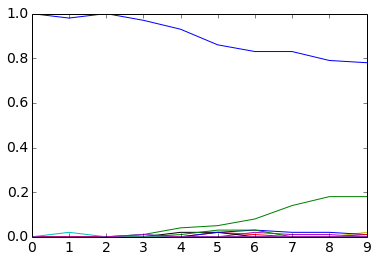

In [766]:
haplotypes = get_all_haplotypes()
for haplotype in haplotypes:
    plt.plot(get_trajectory(haplotype))
plt.show()

In [767]:
colors = ["#781C86", "#571EA2", "#462EB9", "#3F47C9", "#3F63CF", "#447CCD", "#4C90C0", "#56A0AE", "#63AC9A", "#72B485", "#83BA70", "#96BD60", "#AABD52", "#BDBB48", "#CEB541", "#DCAB3C", "#E49938", "#E68133", "#E4632E", "#DF4327", "#DB2122"]

In [768]:
def stacked_trajectory_plot():
    mpl.rcParams['font.size']=18
    plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
    haplotypes = get_all_haplotypes()
    trajectories = [get_trajectory(haplotype) for haplotype in haplotypes]
    plt.stackplot(range(generations), trajectories, colors=colors)
    plt.ylim(0, 1)
    plt.ylabel("frequency")
    plt.xlabel("generation")
    plt.show()

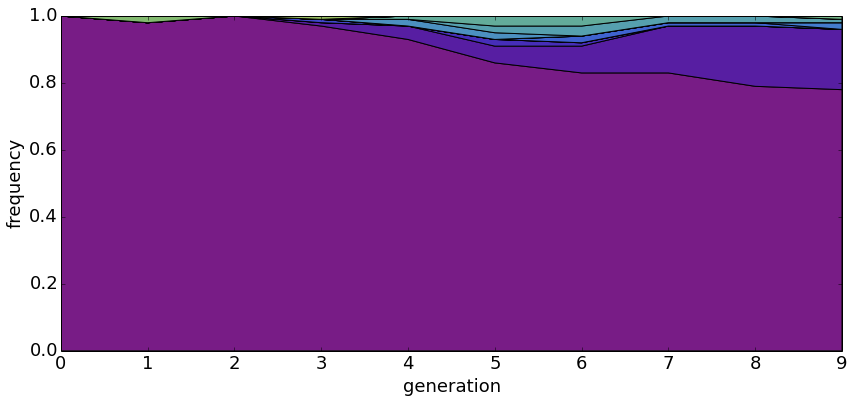

In [769]:
stacked_trajectory_plot()

### Scale up

In [770]:
pop_size = 100
seq_length = 10
generations = 200

In [771]:
def reset():
    base_haplotype = ''.join(["A" for i in range(seq_length)])
    pop.clear()
    del history[:]
    pop[base_haplotype] = pop_size

In [772]:
reset()

In [773]:
pop

{'AAAAAAAAAA': 100}

In [774]:
reset()
simulate()

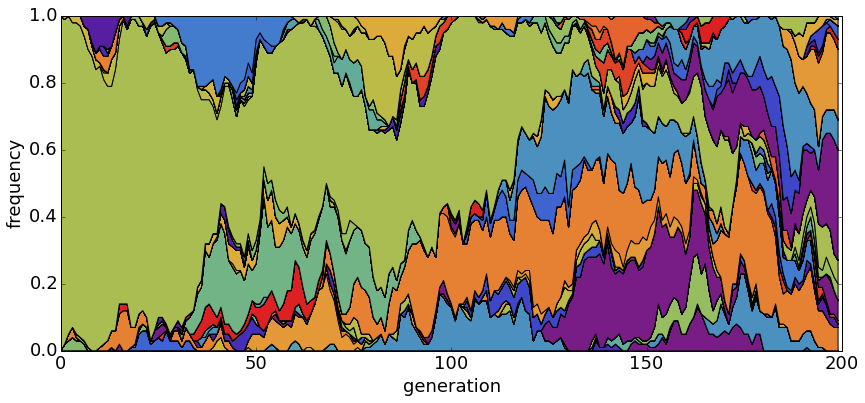

In [775]:
stacked_trajectory_plot()

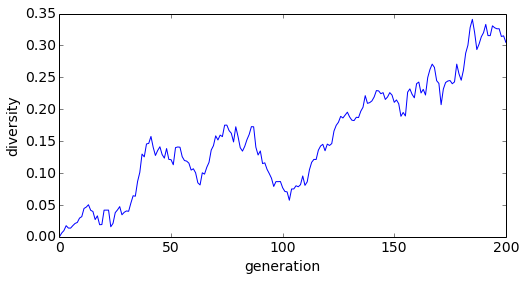

In [776]:
diversity_plot()

# *Exercise: effects of population size and mutation rate on observed haplotype dynamics*

What happens to diversity and observed haplotype dynamics when (A) population size is varied and (B) when mutation rate is varied?

# Including selection

## Include fitness for each haplotype in population model

In [777]:
pop = {}

In [778]:
pop["AAAAAAAAAA"] = 40

In [779]:
pop["AAATAAAAAA"] = 30

In [780]:
pop["AATTTAAAAA"] = 30

In [781]:
fitness = {}

In [782]:
fitness["AAAAAAAAAA"] = 1

In [783]:
fitness["AAATAAAAAA"] = 1.05

In [784]:
fitness["AATTTAAAAA"] = 1.1

## Mutations have fitness effects

If a mutation event creates a new haplotype, assign it a fitness based on its parent fitness.

In [785]:
fitness_effect = 1.1

In [786]:
fitness_chance = 0.1

In [787]:
def get_fitness(haplotype):
    old_fitness = fitness[haplotype]
    if (np.random.random() < fitness_chance):
        return old_fitness * fitness_effect
    else:
        return old_fitness

In [788]:
get_fitness("AAATAAAAAA")

1.05

In [789]:
def mutation_event():
    haplotype = get_random_haplotype()
    if pop[haplotype] > 1:
        pop[haplotype] -= 1
        new_haplotype = get_mutant(haplotype)
        if new_haplotype in pop:
            pop[new_haplotype] += 1
        else:
            pop[new_haplotype] = 1
        if new_haplotype not in fitness:
            fitness[new_haplotype] = get_fitness(haplotype)

In [790]:
mutation_event()

In [791]:
pop

{'AAAAAAAAAA': 40, 'AAATAAAAAA': 30, 'AATTTAAAAA': 29, 'AATTTACAAA': 1}

In [792]:
fitness

{'AAAAAAAAAA': 1, 'AAATAAAAAA': 1.05, 'AATTTAAAAA': 1.1, 'AATTTACAAA': 1.1}

## Fitness affects which haplotypes make it to the next generation

In [793]:
def get_offspring_counts():
    haplotypes = pop.keys()
    frequencies = [pop[haplotype]/float(pop_size) for haplotype in haplotypes]
    fitnesses = [fitness[haplotype] for haplotype in haplotypes]
    weights = [x * y for x,y in zip(frequencies, fitnesses)]
    total = sum(weights)
    weights = [x / total for x in weights]
    return list(np.random.multinomial(pop_size, weights))

In [794]:
get_offspring_counts()

[39, 31, 0, 30]

In [795]:
def offspring_step():
    counts = get_offspring_counts()
    for (haplotype, count) in zip(pop.keys(), counts):
        if (count > 0):
            pop[haplotype] = count
        else:
            del pop[haplotype]
            del fitness[haplotype]

## Testing

In [796]:
pop = {"AAAAAAAAAA": pop_size}
fitness = {"AAAAAAAAAA": 1.0}
history = []

In [797]:
simulate()

In [798]:
pop

{'CAAAAAAAAC': 1,
 'CCAGAAAAAC': 9,
 'CGAAAAAAAA': 6,
 'CGAAAAAAAG': 2,
 'CGAAAAAAAT': 8,
 'CTAAAAAAAC': 19,
 'CTAAAAAAGC': 2,
 'CTAAAGAAAC': 16,
 'CTAATAAAAC': 2,
 'CTACCGAAAC': 17,
 'CTACTGAAAC': 4,
 'CTAGAAAAAC': 2,
 'CTATAAAAAC': 6,
 'GATAACAAAA': 6}

In [799]:
fitness

{'CAAAAAAAAC': 1.2100000000000002,
 'CCAGAAAAAC': 1.2100000000000002,
 'CGAAAAAAAA': 1.1,
 'CGAAAAAAAG': 1.1,
 'CGAAAAAAAT': 1.1,
 'CTAAAAAAAC': 1.1,
 'CTAAAAAAGC': 1.1,
 'CTAAAGAAAC': 1.2100000000000002,
 'CTAATAAAAC': 1.2100000000000002,
 'CTACCGAAAC': 1.2100000000000002,
 'CTACTGAAAC': 1.2100000000000002,
 'CTAGAAAAAC': 1.1,
 'CTATAAAAAC': 1.2100000000000002,
 'GATAACAAAA': 1.0}

## Plotting

In [800]:
def stacked_trajectory_plot_fitness():
    mpl.rcParams['font.size']=18
    plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
    haplotypes = get_all_haplotypes()
    trajectories = [get_trajectory(haplotype) for haplotype in haplotypes]
    plt.stackplot(range(generations), trajectories, colors=colors)
    plt.ylim(0, 1)
    plt.ylabel("frequency")
    plt.xlabel("generation")
    plt.show()

## Simulation

In [925]:
pop_size = 100
seq_length = 100
generations = 300
mutation_rate = 0.0002 # per gen per individual per site
fitness_effect = 2.0
fitness_chance = 0.005

In [926]:
base_haplotype = ''.join(["A" for i in range(seq_length)])
pop.clear()
fitness.clear()
del history[:]
pop[base_haplotype] = pop_size
fitness[base_haplotype] = 1.0

In [927]:
simulate()

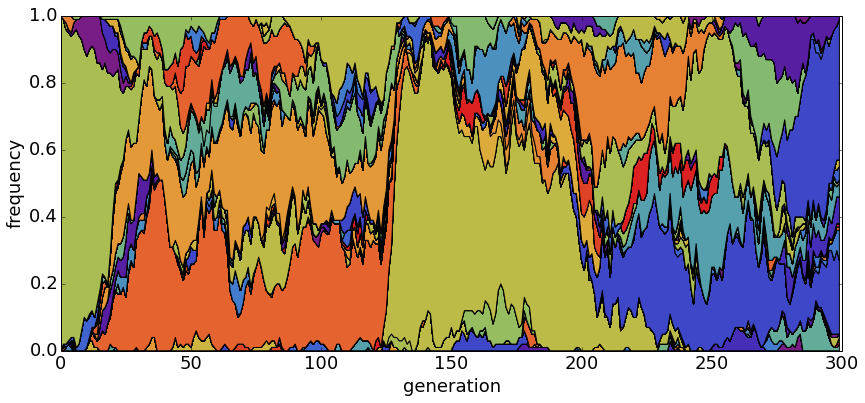

In [928]:
stacked_trajectory_plot()

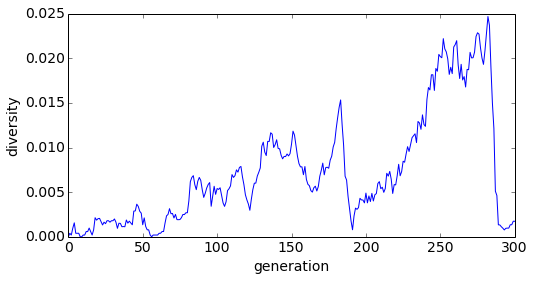

In [909]:
diversity_plot()

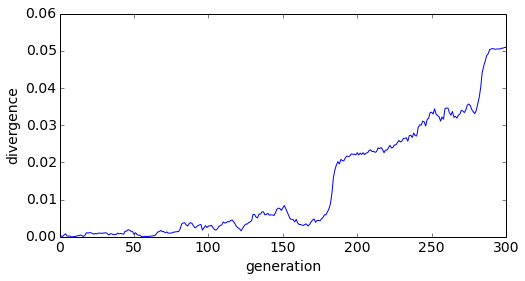

In [910]:
divergence_plot()

# *Exercise: effects of selection on diversity and divergence*

What happens to population turnover, diversity and divergence with constant negative and constant positive selection?

What happens with occasional mutations of large positive effect?